In [ ]:
library(mAr)






```

# Вариант 16

In [1]:
data <- read.table('var_16.csv',sep=',',header = TRUE)
head(data)

,x,y
,<dbl>,<dbl>
1,0.38193849,-0.2844566
2,1.94287509,0.2393766
3,-0.06318463,0.7389477
4,1.11237166,-1.3010627
5,1.23837445,-1.7251592
6,-0.10638129,-0.9677873


In [2]:
# забиваем матрицы из нашего варианта
Phi1 <- c(0.4,0.4,0.2)
Phi1 <- rbind(Phi1,c(0.4,0.4,0.3))
Phi1 <- rbind(Phi1,c(0.1,0.3,0.2))
Phi2 <- c(-0.4,0.3,0.2)
Phi2 <- rbind(Phi2,c(0.2,0.3,0.2))
Phi2 <- rbind(Phi2,c(0.3,-0.2,0.2))
# дальше везде одинаково
Phi <- cbind(Phi1,Phi2)
I <- diag(1,3,3)
Zero <- diag(0,3,3)
IZ <- cbind(I,Zero)
F <- rbind(Phi,IZ)
F

Phi1,0.4,0.4,0.2,-0.4,0.3,0.2
,0.4,0.4,0.3,0.2,0.3,0.2
,0.1,0.3,0.2,0.3,-0.2,0.2
,1.0,0.0,0.0,0.0,0.0,0.0
,0.0,1.0,0.0,0.0,0.0,0.0
,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
eval <- eigen(F,only.values= TRUE)
eigen_val <- Mod(eval$values)

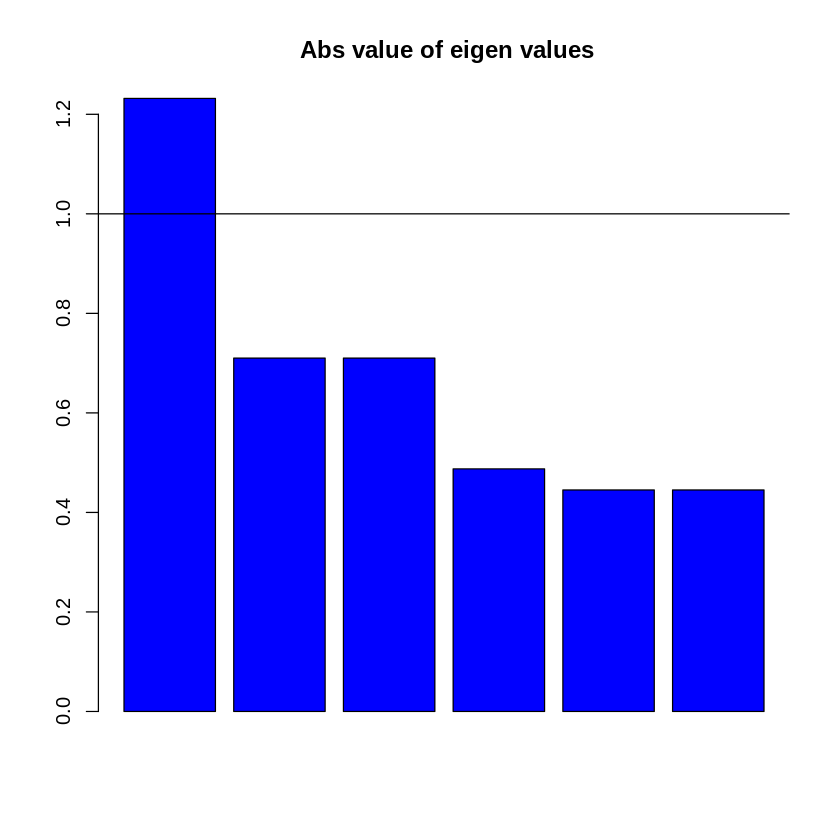

In [4]:
barplot(eigen_val,col = "blue",main = " Abs value of eigen values")
abline(h=1,col = "black")

Есть собственное значение > 1 следовательно ряд не стационарный

(Все собственные значения < 1 => ряд стационарный.)

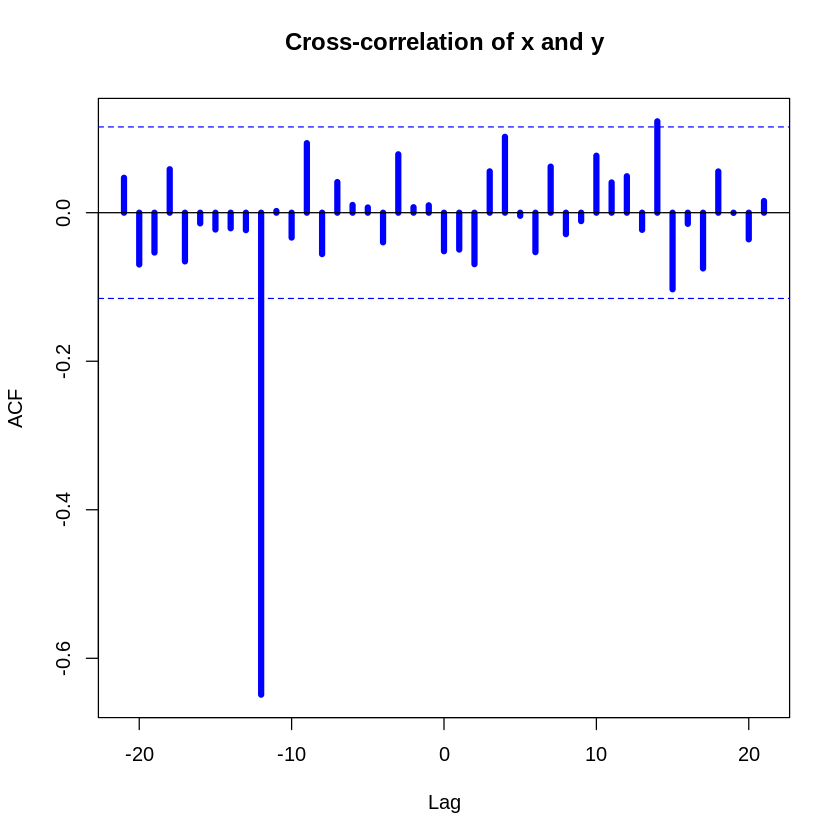

In [5]:
ccf(data$x,data$y,lwd = 5, main = "Cross-correlation of x and y",col = "blue")

Задержка 7. Видимо, если она положительная, то впереди y.

In [6]:
res <- list(variant  = 16,
           eigen_values = eigen_val,
           stationarity = 'No',
           delay        = -12,
           ahead        = 'x'
)
saveRDS(res,'result.rds')